In [1]:
# %load_ext autoreload
# %autoreload 2

## Brightness and LIME image explainer

In [4]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import mark_boundaries

from astroExplain.image.neighbors import Neighbors
from sdss.utils.managefiles import FileDirectory

%matplotlib inline

In [2]:
data = "/home/edgar/xai-astronomy/data/images"
# load data
image = plt.imread(f"{data}/weird.jpg")/255.

In [5]:
def segment(image, sigma, compactness, nsegments):
 
    slic_parameters = {'sigma': sigma, 'compactness': compactness}

    nghs = Neighbors(
        image=image,
        number_segments=nsegments,
        slic_parameters=slic_parameters,
        random_seed=0
    )

    image_with_boundaries = mark_boundaries(nghs.image, nghs.segments)

    plt.clf()
    plt.imshow(image_with_boundaries)
    plt.axis("off")
    plt.tight_layout()

    save_to = "/home/edgar/explain-me-why/sections/figures/lime/hoag_object"
    fname = f"segments_{nsegments}_sigma_{sigma}_compactness_{compactness}"
    plt.savefig(f"{save_to}/{fname}.pdf")
    plt.savefig(f"{save_to}/{fname}.png")

    return image_with_boundaries

## Different segmentations

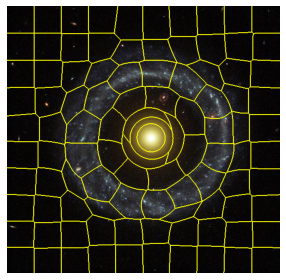

In [6]:
image_with_boundaries = segment(image, sigma=16, compactness=10, nsegments=100)